<a href="https://colab.research.google.com/github/KiranIT/DataScience/blob/master/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
from google.colab import files
df = files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [7]:
df

{'gld_price_data.csv': b'Date,SPX,GLD,USO,SLV,EUR/USD\r\n1/2/2008,1447.160034,84.860001,78.470001,15.18,1.471692\r\n1/3/2008,1447.160034,85.57,78.370003,15.285,1.474491\r\n1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492\r\n1/7/2008,1416.180054,84.769997,75.5,15.053,1.468299\r\n1/8/2008,1390.189941,86.779999,76.059998,15.59,1.557099\r\n1/9/2008,1409.130005,86.550003,75.25,15.52,1.466405\r\n1/10/2008,1420.329956,88.25,74.019997,16.061001,1.4801\r\n1/11/2008,1401.02002,88.580002,73.089996,16.077,1.479006\r\n1/14/2008,1416.25,89.540001,74.25,16.280001,1.4869\r\n1/15/2008,1380.949951,87.989998,72.779999,15.834,1.48021\r\n1/16/2008,1373.199951,86.699997,71.849998,15.654,1.466405\r\n1/17/2008,1333.25,86.5,71.029999,15.717,1.464\r\n1/18/2008,1325.189941,87.419998,71.540001,16.030001,1.461796\r\n1/22/2008,1310.5,88.169998,70.550003,15.902,1.464794\r\n1/23/2008,1338.599976,87.889999,69.5,15.9,1.463208\r\n1/24/2008,1352.069946,90.080002,70.93,16.299999,1.47741\r\n1/25/2008,1330.609985,90

In [9]:
df = pd.read_csv('gld_price_data.csv')

In [10]:
df.head(7)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
df.shape

(2290, 6)

In [14]:
#check for missing values

df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

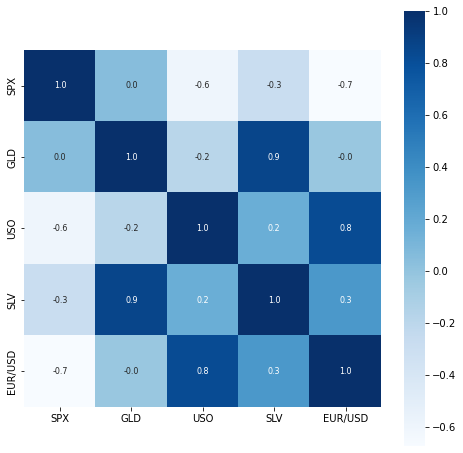

In [17]:
#Correlation

cr = df.corr()

plt.figure(figsize = (8,8))
sns.heatmap(cr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
print(cr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


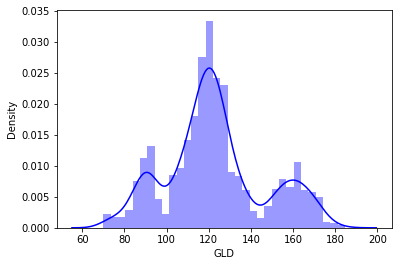

In [21]:
#Check the distribution of GLD price

sns.distplot(df['GLD'],color = 'Blue')

In [23]:
#split the data

x = df.drop(['Date','GLD'], axis = 1)
y = df['GLD']

In [25]:
x.shape

(2290, 4)

In [26]:
y.shape

(2290,)

In [27]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.2, random_state=2)

In [30]:
rf = RandomForestRegressor(n_estimators = 107)

In [31]:
#Training Model
rf.fit(x_tr,y_tr)

RandomForestRegressor(n_estimators=107)

In [32]:
#Evaluation of model

test_pred = rf.predict(x_te)

In [33]:
print(test_pred)

[168.48383137  81.79822429 116.19224275 127.64429956 120.74467409
 154.91308161 150.41719482 126.08177624 117.59738185 126.01215018
 116.62794485 171.65560856 141.95308238 167.59626036 115.08729009
 117.62140267 140.05532905 169.89990737 159.15177795 158.85299062
 155.12495332 125.03448639 176.59794396 157.35449047 125.11981334
  93.82532679  77.27710297 120.60121496 119.12140174 167.51467213
  88.20243044 125.19915877  90.99458007 117.65252348 121.19270926
 136.3627113  115.62897295 115.46644917 146.97887741 107.21570193
 103.94280603  87.07887637 126.70626224 117.96093459 154.90598019
 119.67448603 108.37803745 107.95121333  93.24906639 126.87943774
  74.75672959 113.71074637 121.29598165 111.29355093 118.88186828
 120.76822349 159.19532656 167.3103753  147.15915585  85.68962442
  94.17775746  86.81196158  90.55953306 119.09168304 126.3964492
 127.45794385 169.23878437 122.2065411  117.42541962  98.64186905
 168.21560804 143.17270872 131.91289908 121.25523605 121.2707471
 119.6231778

In [36]:
rf.score(x_te,y_te)

0.9892229738947141

In [37]:
#R-squared error
r2 = metrics.r2_score(y_te,test_pred) #evaluating between actual and predicted values
print("R-SQUARED ERROR :",r2)

R-SQUARED ERROR : 0.9892229738947141


In [38]:
#Compare the Actual Values and Predicted Values in a Plot

y_te = list(y_te)

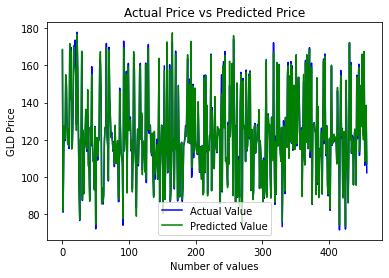

In [39]:
plt.plot(y_te, color='blue', label = 'Actual Value')
plt.plot(test_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()